<center><h1>Plan Pathology</h1></center>
<hr>

# thanks to...

**Kaggle Kernel**
> [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy?scriptVersionId=2051374)  
> [Plant Pathology 2020 : EDA + Models](https://www.kaggle.com/tarunpaparaju/plant-pathology-2020-eda-models)

**Problem Asked**
> [OpenCV - How to Read Image Data in Python](https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html)  
> [pandas - Functions for DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)  
> [pandas - Functions for DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)  
> [seaborn - Visualize Heatmap](https://rfriend.tistory.com/419)  
> [tensorflow - Read Image File](https://www.tensorflow.org/api_docs/python/tf/io/read_file)  
> [tensorflow - Load Image](https://www.tensorflow.org/tutorials/load_data/images)  
> [tensorflow - Augment Image](https://www.tensorflow.org/tutorials/images/data_augmentation)  
> [keras - How to Use Pre Trained Model](https://keras.io/ko/applications/)  
> [keras - Visualize Model](https://keras.io/visualization/)    
> [keras - Visualize Model not Working: necessary to install graphviz sofrware](https://github.com/XifengGuo/CapsNet-Keras/issues/25)    
> [keras - MobilNetV2 Input Shape Problem: only input shape in 128, 160, 192, 224 possible](https://github.com/keras-team/keras/issues/8090)    

# table of contents <a id="top"></a>
1. [Define the Problem](#1)
2. [Gather the Data](#2)
3. [Prepare Data for Consumption](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
    3. [Data Cleaning](#3.3)
4. [Perform Exploratory Analysis with Statistics](#4)
5. [Model Data](#5)
    1. [Prepare Data](#5.1)
    2. [Machine Learning Modeling](#5.2)
    3. [Hyper Parameter Tuning](#5.3)
    4. [Feature Tuning](#5.4)
6. [Validate and Implement](#6)
    1. [Ensemble](#6.1)

<hr>

# 1. Define the Problem <a id="1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Specific Objectives** - from Kaggle](https://www.kaggle.com/c/plant-pathology-2020-fgvc7/overview/description)<br> 
> Objectives of ‘Plant Pathology Challenge’ are to train a model using images of training dataset to 
> 
> 1) Accurately classify a given image from testing dataset into different diseased category or a healthy leaf  
> 2) Accurately distinguish between many diseases, sometimes more than one on a single leaf  
> 3) Deal with rare classes and novel symptoms  
> 4) Address depth perception—angle, light, shade, physiological age of the leaf  
> 5) Incorporate expert knowledge in identification, annotation, quantification, and guiding computer vision to search for relevant features during learning.  

# 2. Gather the Data <a id="2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Data Description** - from Kaggle](https://www.kaggle.com/c/plant-pathology-2020-fgvc7/data)
> Given a photo of an apple leaf, can you accurately assess its health? This competition will challenge you to distinguish between leaves which are healthy, those which are infected with apple rust, those that have apple scab, and those with more than one disease.

> **train.csv**  
> image_id: the foreign key for the parquet files  
> combinations: one of the target labels  
> healthy: one of the target labels  
> rust: one of the target labels  
> scab: one of the target labels  
>  
> **images**  
> A folder containing the train and test images, in jpg format  
>  
> **test.csv**  
> image_id: the foreign key for the parquet files  
>  
> **sample_submission.csv**  
> image_id: the foreign key for the parquet files  
> combinations: one of the target labels  
> healthy: one of the target labels  
> rust: one of the target labels  
> scab: one of the target labels  

# 3. Perpare Data for Consumption <a id="3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 3.1. Import Library <a id="3.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [1]:
### Python Standard Library
import os

### Numerical Library
import numpy as np

### Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

### DataFrame Library
import pandas as pd

### Image Library
import cv2

### Machine Learning Library
from sklearn.model_selection import train_test_split

### Deep Learning Library
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_rows = 499
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline

## 3.2. Load Dataset <a id="3.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

<br>**CSV Files**

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [5]:
train_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [6]:
test_df

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


<br>**Image Files**

In [7]:
def read_image(image_id):
    image_path = './data/images/' + image_id + '.jpg'
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image

In [8]:
sample_idx = np.random.randint(0, 1821)
sample_image_id = train_df.loc[sample_idx, 'image_id']
sample_image = read_image(sample_image_id)
sample_image

array([[[ 21,  52,  25],
        [ 21,  52,  25],
        [ 21,  52,  25],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[ 21,  52,  25],
        [ 21,  52,  25],
        [ 21,  52,  25],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[ 21,  52,  25],
        [ 21,  52,  25],
        [ 21,  52,  25],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       ...,

       [[219, 202, 176],
        [220, 203, 177],
        [221, 204, 178],
        ...,
        [ 55,  91,  55],
        [ 55,  91,  55],
        [ 55,  91,  55]],

       [[219, 202, 176],
        [219, 202, 176],
        [219, 202, 176],
        ...,
        [ 55,  91,  55],
        [ 55,  91,  55],
        [ 55,  91,  55]],

       [[217, 200, 174],
        [217, 200, 174],
        [217, 200, 174],
        ...,
        [ 55,  91,  55],
        [ 55,  91,  55],
        [ 55,  91,  55]]

In [9]:
print('Shape of Image {}'.format(sample_image.shape))

Shape of Image (1365, 2048, 3)


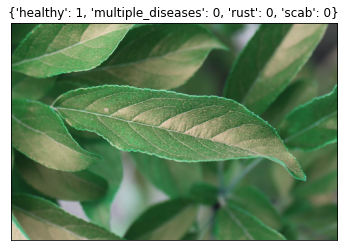

In [10]:
title = train_df.loc[sample_idx, 'healthy':].to_dict()
plt.imshow(sample_image)
plt.xticks([])
plt.yticks([])
plt.title(title)
plt.show()

## 3.3. Data Cleaning <a id="3.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

> Nothing to Clean. There are no missing values, and all the columns are used for target value in modeling.

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB


In [13]:
train_df.describe(include='all')

,image_id,healthy,multiple_diseases,rust,scab
count,1821,1821.000000,1821.000000,1821.000000,1821.000000
unique,1821,NaN,NaN,NaN,NaN
top,Train_1003,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,0.283361,0.049973,0.341571,0.325096
std,NaN,0.450754,0.217948,0.474367,0.468539
min,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000


In [14]:
test_df.describe(include='all')

,image_id
count,1821
unique,1821
top,Test_1375
freq,1


In [15]:
train_df.isna().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [16]:
test_df.isna().sum()

image_id    0
dtype: int64

# 4. Perform Exploratory Data Analysis <a id="4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [17]:
def barplot(dataset, attribute, index):
    data = dataset[attribute].value_counts()
    data.index = index
    print(data)
    plt.bar(data.index, data.values)
    plt.ylabel('Frequency')
    plt.show()

Not Healthy    1305
Healthy         516
Name: healthy, dtype: int64


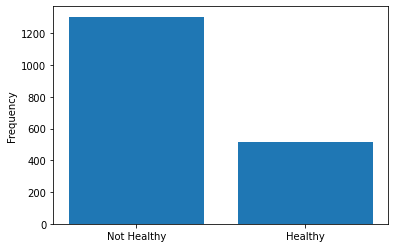

In [18]:
barplot(train_df, 'healthy', ['Not Healthy', 'Healthy'])

No Multiple Diseases    1730
Multiple Diseases         91
Name: multiple_diseases, dtype: int64


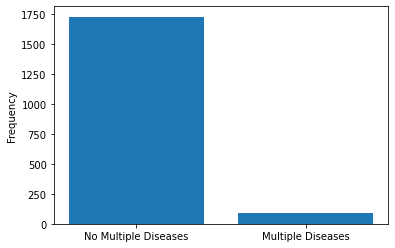

In [19]:
barplot(train_df, 'multiple_diseases', ['No Multiple Diseases', 'Multiple Diseases'])

No Rust    1199
Rust        622
Name: rust, dtype: int64


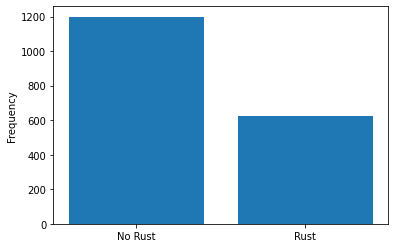

In [20]:
barplot(train_df, 'rust', ['No Rust', 'Rust'])

No Scab    1229
Scab        592
Name: scab, dtype: int64


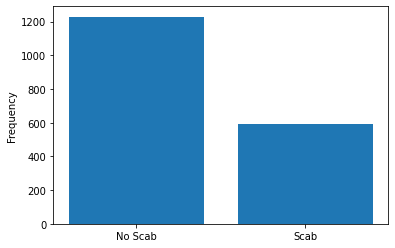

In [21]:
barplot(train_df, 'scab', ['No Scab', 'Scab'])

No Multiple Diseases    1214
Multiple Diseases         91
Name: multiple_diseases, dtype: int64


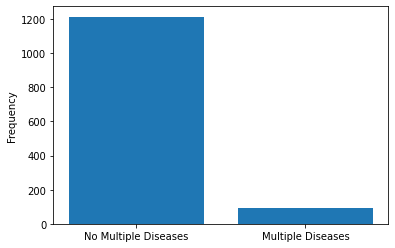

In [22]:
not_healty_df = train_df.loc[train_df['healthy'] == 0, :]
barplot(not_healty_df, 'multiple_diseases', ['No Multiple Diseases', 'Multiple Diseases'])

No Rust    683
Rust       622
Name: rust, dtype: int64


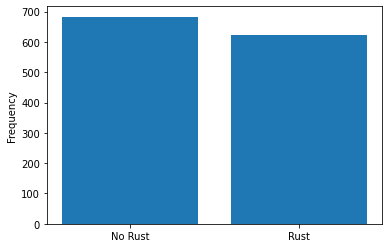

In [23]:
not_healty_df = train_df.loc[train_df['healthy'] == 0, :]
barplot(not_healty_df, 'rust', ['No Rust', 'Rust'])

No Scab    713
Scab       592
Name: scab, dtype: int64


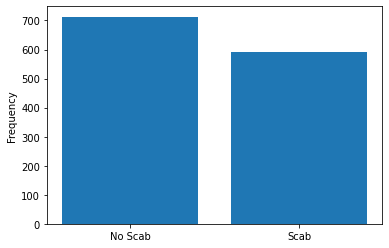

In [24]:
not_healty_df = train_df.loc[train_df['healthy'] == 0, :]
barplot(not_healty_df, 'scab', ['No Scab', 'Scab'])

In [25]:
train_df.corr()

,healthy,multiple_diseases,rust,scab
healthy,1.000000,-0.144217,-0.452903,-0.436420
multiple_diseases,-0.144217,1.000000,-0.165190,-0.159178
rust,-0.452903,-0.165190,1.000000,-0.499885
scab,-0.436420,-0.159178,-0.499885,1.000000


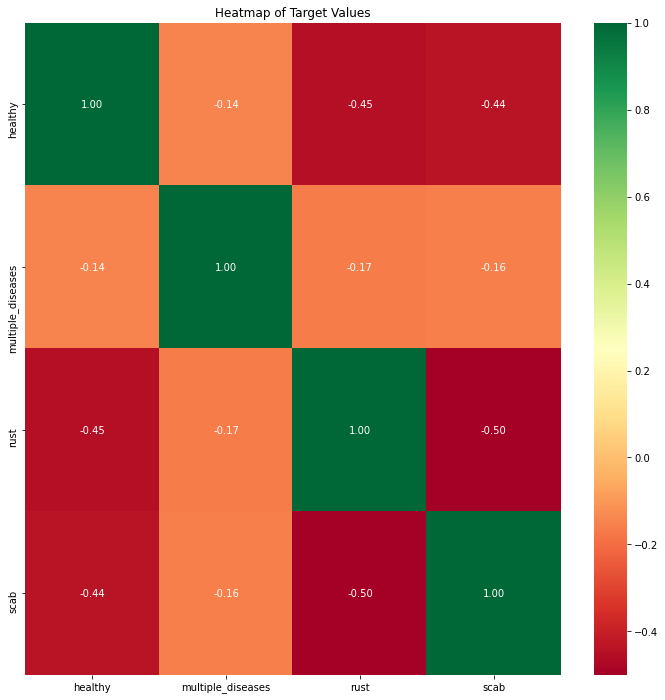

In [26]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Heatmap of Target Values')
plt.show()

# 5. Model Data <a id="5"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 5.1. Prepare Dataset <a id="5.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

**Get Image and Label from Dataframe**

In [27]:
train_image_path = ['./data/images/' + filename + '.jpg' for filename in train_df.loc[:, 'image_id']]
train_labels = np.asarray(train_df.loc[:, 'healthy':])

for path, label in zip(train_image_path, train_labels):
    print(path, label)

./data/images/Train_0.jpg [0 0 0 1]
./data/images/Train_1.jpg [0 1 0 0]
./data/images/Train_2.jpg [1 0 0 0]
./data/images/Train_3.jpg [0 0 1 0]
./data/images/Train_4.jpg [1 0 0 0]
./data/images/Train_5.jpg [1 0 0 0]
./data/images/Train_6.jpg [0 1 0 0]
./data/images/Train_7.jpg [0 0 0 1]
./data/images/Train_8.jpg [0 0 0 1]
./data/images/Train_9.jpg [1 0 0 0]
./data/images/Train_10.jpg [0 0 1 0]
./data/images/Train_11.jpg [0 0 0 1]
./data/images/Train_12.jpg [0 0 0 1]
./data/images/Train_13.jpg [1 0 0 0]
./data/images/Train_14.jpg [0 0 1 0]
./data/images/Train_15.jpg [0 0 1 0]
./data/images/Train_16.jpg [0 0 0 1]
./data/images/Train_17.jpg [0 0 0 1]
./data/images/Train_18.jpg [1 0 0 0]
./data/images/Train_19.jpg [0 0 0 1]
./data/images/Train_20.jpg [0 0 0 1]
./data/images/Train_21.jpg [0 0 1 0]
./data/images/Train_22.jpg [0 0 0 1]
./data/images/Train_23.jpg [0 0 1 0]
./data/images/Train_24.jpg [1 0 0 0]
./data/images/Train_25.jpg [0 1 0 0]
./data/images/Train_26.jpg [0 0 1 0]
./data/imag

./data/images/Train_822.jpg [0 0 1 0]
./data/images/Train_823.jpg [0 0 0 1]
./data/images/Train_824.jpg [0 0 0 1]
./data/images/Train_825.jpg [0 0 1 0]
./data/images/Train_826.jpg [1 0 0 0]
./data/images/Train_827.jpg [0 0 1 0]
./data/images/Train_828.jpg [0 0 1 0]
./data/images/Train_829.jpg [0 0 1 0]
./data/images/Train_830.jpg [0 0 1 0]
./data/images/Train_831.jpg [0 0 0 1]
./data/images/Train_832.jpg [0 0 1 0]
./data/images/Train_833.jpg [1 0 0 0]
./data/images/Train_834.jpg [1 0 0 0]
./data/images/Train_835.jpg [1 0 0 0]
./data/images/Train_836.jpg [0 0 1 0]
./data/images/Train_837.jpg [0 0 1 0]
./data/images/Train_838.jpg [0 0 0 1]
./data/images/Train_839.jpg [1 0 0 0]
./data/images/Train_840.jpg [0 0 1 0]
./data/images/Train_841.jpg [0 0 1 0]
./data/images/Train_842.jpg [0 0 0 1]
./data/images/Train_843.jpg [0 0 1 0]
./data/images/Train_844.jpg [0 0 0 1]
./data/images/Train_845.jpg [0 0 0 1]
./data/images/Train_846.jpg [0 0 0 1]
./data/images/Train_847.jpg [0 0 1 0]
./data/image

./data/images/Train_1394.jpg [0 0 1 0]
./data/images/Train_1395.jpg [0 0 0 1]
./data/images/Train_1396.jpg [1 0 0 0]
./data/images/Train_1397.jpg [1 0 0 0]
./data/images/Train_1398.jpg [0 0 1 0]
./data/images/Train_1399.jpg [0 0 1 0]
./data/images/Train_1400.jpg [0 0 1 0]
./data/images/Train_1401.jpg [0 0 0 1]
./data/images/Train_1402.jpg [0 0 1 0]
./data/images/Train_1403.jpg [0 0 0 1]
./data/images/Train_1404.jpg [0 0 1 0]
./data/images/Train_1405.jpg [0 0 0 1]
./data/images/Train_1406.jpg [0 0 1 0]
./data/images/Train_1407.jpg [0 0 1 0]
./data/images/Train_1408.jpg [1 0 0 0]
./data/images/Train_1409.jpg [0 0 1 0]
./data/images/Train_1410.jpg [0 0 0 1]
./data/images/Train_1411.jpg [0 0 0 1]
./data/images/Train_1412.jpg [0 0 1 0]
./data/images/Train_1413.jpg [0 0 1 0]
./data/images/Train_1414.jpg [1 0 0 0]
./data/images/Train_1415.jpg [1 0 0 0]
./data/images/Train_1416.jpg [0 0 0 1]
./data/images/Train_1417.jpg [1 0 0 0]
./data/images/Train_1418.jpg [0 0 1 0]
./data/images/Train_1419.

In [28]:
test_image_path = ['./data/images/' + filename + '.jpg' for filename in test_df.loc[:, 'image_id']]
for path in test_image_path:
    print(path)

./data/images/Test_0.jpg
./data/images/Test_1.jpg
./data/images/Test_2.jpg
./data/images/Test_3.jpg
./data/images/Test_4.jpg
./data/images/Test_5.jpg
./data/images/Test_6.jpg
./data/images/Test_7.jpg
./data/images/Test_8.jpg
./data/images/Test_9.jpg
./data/images/Test_10.jpg
./data/images/Test_11.jpg
./data/images/Test_12.jpg
./data/images/Test_13.jpg
./data/images/Test_14.jpg
./data/images/Test_15.jpg
./data/images/Test_16.jpg
./data/images/Test_17.jpg
./data/images/Test_18.jpg
./data/images/Test_19.jpg
./data/images/Test_20.jpg
./data/images/Test_21.jpg
./data/images/Test_22.jpg
./data/images/Test_23.jpg
./data/images/Test_24.jpg
./data/images/Test_25.jpg
./data/images/Test_26.jpg
./data/images/Test_27.jpg
./data/images/Test_28.jpg
./data/images/Test_29.jpg
./data/images/Test_30.jpg
./data/images/Test_31.jpg
./data/images/Test_32.jpg
./data/images/Test_33.jpg
./data/images/Test_34.jpg
./data/images/Test_35.jpg
./data/images/Test_36.jpg
./data/images/Test_37.jpg
./data/images/Test_38.

./data/images/Test_640.jpg
./data/images/Test_641.jpg
./data/images/Test_642.jpg
./data/images/Test_643.jpg
./data/images/Test_644.jpg
./data/images/Test_645.jpg
./data/images/Test_646.jpg
./data/images/Test_647.jpg
./data/images/Test_648.jpg
./data/images/Test_649.jpg
./data/images/Test_650.jpg
./data/images/Test_651.jpg
./data/images/Test_652.jpg
./data/images/Test_653.jpg
./data/images/Test_654.jpg
./data/images/Test_655.jpg
./data/images/Test_656.jpg
./data/images/Test_657.jpg
./data/images/Test_658.jpg
./data/images/Test_659.jpg
./data/images/Test_660.jpg
./data/images/Test_661.jpg
./data/images/Test_662.jpg
./data/images/Test_663.jpg
./data/images/Test_664.jpg
./data/images/Test_665.jpg
./data/images/Test_666.jpg
./data/images/Test_667.jpg
./data/images/Test_668.jpg
./data/images/Test_669.jpg
./data/images/Test_670.jpg
./data/images/Test_671.jpg
./data/images/Test_672.jpg
./data/images/Test_673.jpg
./data/images/Test_674.jpg
./data/images/Test_675.jpg
./data/images/Test_676.jpg
.

./data/images/Test_1226.jpg
./data/images/Test_1227.jpg
./data/images/Test_1228.jpg
./data/images/Test_1229.jpg
./data/images/Test_1230.jpg
./data/images/Test_1231.jpg
./data/images/Test_1232.jpg
./data/images/Test_1233.jpg
./data/images/Test_1234.jpg
./data/images/Test_1235.jpg
./data/images/Test_1236.jpg
./data/images/Test_1237.jpg
./data/images/Test_1238.jpg
./data/images/Test_1239.jpg
./data/images/Test_1240.jpg
./data/images/Test_1241.jpg
./data/images/Test_1242.jpg
./data/images/Test_1243.jpg
./data/images/Test_1244.jpg
./data/images/Test_1245.jpg
./data/images/Test_1246.jpg
./data/images/Test_1247.jpg
./data/images/Test_1248.jpg
./data/images/Test_1249.jpg
./data/images/Test_1250.jpg
./data/images/Test_1251.jpg
./data/images/Test_1252.jpg
./data/images/Test_1253.jpg
./data/images/Test_1254.jpg
./data/images/Test_1255.jpg
./data/images/Test_1256.jpg
./data/images/Test_1257.jpg
./data/images/Test_1258.jpg
./data/images/Test_1259.jpg
./data/images/Test_1260.jpg
./data/images/Test_1

**Train-Validation Split**

In [29]:
train_image_path, validation_image_path, train_labels, validation_labels = train_test_split(
    train_image_path,
    train_labels, 
    test_size=0.2
)

In [30]:
len(train_image_path)

1456

In [31]:
train_labels.shape

(1456, 4)

In [32]:
len(validation_image_path)

365

In [33]:
validation_labels.shape

(365, 4)

In [34]:
for path, label in zip(train_image_path, train_labels):
    print(path, label)

./data/images/Train_797.jpg [0 0 0 1]
./data/images/Train_1465.jpg [0 0 1 0]
./data/images/Train_1062.jpg [0 0 0 1]
./data/images/Train_450.jpg [1 0 0 0]
./data/images/Train_1622.jpg [0 0 0 1]
./data/images/Train_359.jpg [1 0 0 0]
./data/images/Train_1603.jpg [0 0 1 0]
./data/images/Train_1336.jpg [0 0 0 1]
./data/images/Train_152.jpg [0 0 0 1]
./data/images/Train_1592.jpg [0 0 1 0]
./data/images/Train_629.jpg [0 1 0 0]
./data/images/Train_950.jpg [0 0 1 0]
./data/images/Train_641.jpg [0 0 0 1]
./data/images/Train_1752.jpg [0 0 1 0]
./data/images/Train_3.jpg [0 0 1 0]
./data/images/Train_288.jpg [0 0 1 0]
./data/images/Train_409.jpg [0 0 0 1]
./data/images/Train_775.jpg [0 0 0 1]
./data/images/Train_754.jpg [0 1 0 0]
./data/images/Train_1430.jpg [0 0 0 1]
./data/images/Train_1445.jpg [0 0 0 1]
./data/images/Train_173.jpg [0 0 0 1]
./data/images/Train_271.jpg [1 0 0 0]
./data/images/Train_1773.jpg [0 0 1 0]
./data/images/Train_1657.jpg [0 0 1 0]
./data/images/Train_1249.jpg [0 0 0 1]
./

./data/images/Train_1600.jpg [1 0 0 0]
./data/images/Train_1038.jpg [0 0 0 1]
./data/images/Train_1194.jpg [0 0 1 0]
./data/images/Train_956.jpg [1 0 0 0]
./data/images/Train_532.jpg [1 0 0 0]
./data/images/Train_822.jpg [0 0 1 0]
./data/images/Train_1553.jpg [0 0 0 1]
./data/images/Train_1374.jpg [0 0 1 0]
./data/images/Train_1247.jpg [1 0 0 0]
./data/images/Train_1483.jpg [0 0 0 1]
./data/images/Train_1316.jpg [0 0 1 0]
./data/images/Train_201.jpg [1 0 0 0]
./data/images/Train_1115.jpg [1 0 0 0]
./data/images/Train_1795.jpg [0 0 1 0]
./data/images/Train_500.jpg [0 0 1 0]
./data/images/Train_436.jpg [0 1 0 0]
./data/images/Train_730.jpg [1 0 0 0]
./data/images/Train_316.jpg [0 0 0 1]
./data/images/Train_155.jpg [0 0 0 1]
./data/images/Train_451.jpg [0 0 1 0]
./data/images/Train_586.jpg [0 0 1 0]
./data/images/Train_970.jpg [0 0 0 1]
./data/images/Train_672.jpg [0 0 1 0]
./data/images/Train_1295.jpg [0 0 0 1]
./data/images/Train_610.jpg [0 0 1 0]
./data/images/Train_1403.jpg [0 0 0 1]


./data/images/Train_22.jpg [0 0 0 1]
./data/images/Train_616.jpg [1 0 0 0]
./data/images/Train_27.jpg [0 0 0 1]
./data/images/Train_1611.jpg [1 0 0 0]
./data/images/Train_976.jpg [0 0 1 0]
./data/images/Train_743.jpg [0 0 1 0]
./data/images/Train_546.jpg [1 0 0 0]
./data/images/Train_960.jpg [1 0 0 0]
./data/images/Train_917.jpg [0 0 0 1]
./data/images/Train_1120.jpg [0 0 0 1]
./data/images/Train_957.jpg [0 0 1 0]
./data/images/Train_1286.jpg [1 0 0 0]
./data/images/Train_988.jpg [0 0 0 1]
./data/images/Train_1393.jpg [0 0 0 1]
./data/images/Train_1099.jpg [0 0 0 1]
./data/images/Train_609.jpg [0 0 1 0]
./data/images/Train_1499.jpg [0 0 1 0]
./data/images/Train_825.jpg [0 0 1 0]
./data/images/Train_707.jpg [0 0 1 0]
./data/images/Train_1171.jpg [1 0 0 0]
./data/images/Train_1205.jpg [0 0 1 0]
./data/images/Train_372.jpg [0 0 0 1]
./data/images/Train_742.jpg [0 0 1 0]
./data/images/Train_1052.jpg [0 0 0 1]
./data/images/Train_1147.jpg [0 0 1 0]
./data/images/Train_687.jpg [0 0 1 0]
./da

./data/images/Train_890.jpg [1 0 0 0]
./data/images/Train_1418.jpg [0 0 1 0]
./data/images/Train_1597.jpg [1 0 0 0]
./data/images/Train_64.jpg [0 0 1 0]
./data/images/Train_1632.jpg [0 0 0 1]
./data/images/Train_1643.jpg [0 0 0 1]
./data/images/Train_694.jpg [1 0 0 0]
./data/images/Train_849.jpg [1 0 0 0]
./data/images/Train_897.jpg [1 0 0 0]
./data/images/Train_594.jpg [0 0 1 0]
./data/images/Train_136.jpg [1 0 0 0]
./data/images/Train_877.jpg [1 0 0 0]
./data/images/Train_151.jpg [1 0 0 0]
./data/images/Train_264.jpg [1 0 0 0]
./data/images/Train_1584.jpg [0 0 1 0]
./data/images/Train_1812.jpg [0 0 0 1]
./data/images/Train_1820.jpg [0 0 0 1]
./data/images/Train_1561.jpg [0 0 1 0]
./data/images/Train_1394.jpg [0 0 1 0]
./data/images/Train_244.jpg [0 0 1 0]
./data/images/Train_750.jpg [0 0 1 0]
./data/images/Train_946.jpg [0 0 0 1]
./data/images/Train_572.jpg [1 0 0 0]
./data/images/Train_688.jpg [0 0 0 1]
./data/images/Train_132.jpg [0 0 1 0]
./data/images/Train_1583.jpg [1 0 0 0]
./d

./data/images/Train_14.jpg [0 0 1 0]
./data/images/Train_210.jpg [0 0 0 1]
./data/images/Train_794.jpg [1 0 0 0]
./data/images/Train_367.jpg [1 0 0 0]
./data/images/Train_1805.jpg [0 0 1 0]
./data/images/Train_815.jpg [1 0 0 0]
./data/images/Train_116.jpg [0 0 0 1]
./data/images/Train_1227.jpg [1 0 0 0]
./data/images/Train_168.jpg [0 0 0 1]
./data/images/Train_1172.jpg [0 0 0 1]
./data/images/Train_1061.jpg [0 0 0 1]
./data/images/Train_1672.jpg [1 0 0 0]
./data/images/Train_89.jpg [0 0 1 0]
./data/images/Train_746.jpg [1 0 0 0]
./data/images/Train_1271.jpg [1 0 0 0]
./data/images/Train_577.jpg [0 0 1 0]
./data/images/Train_1542.jpg [0 0 0 1]
./data/images/Train_635.jpg [1 0 0 0]
./data/images/Train_1505.jpg [0 0 0 1]
./data/images/Train_1466.jpg [1 0 0 0]
./data/images/Train_769.jpg [1 0 0 0]
./data/images/Train_1381.jpg [1 0 0 0]
./data/images/Train_491.jpg [1 0 0 0]
./data/images/Train_1158.jpg [0 0 1 0]
./data/images/Train_70.jpg [1 0 0 0]
./data/images/Train_455.jpg [0 0 1 0]
./da

**Tensorflow Dataset**

In [35]:
def decode_image(path, label=None, image_shape=(512, 512)):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    image = tf.image.resize(image, image_shape)
    
    if label == None:
        return image
    else:
        return image, label

In [36]:
def augment_image(image, label=None):
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if label == None:
        return image
    else:
        return image, label

In [37]:
BATCH_SIZE = 64
AUTOTUNE = tf.data.experimental.AUTOTUNE
N_TRAIN = train_labels.shape[0]

In [38]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_path, train_labels))
train_dataset = train_dataset.map(decode_image, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.map(augment_image, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.shuffle(N_TRAIN // 4)
train_dataset = train_dataset.prefetch(AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat()

In [39]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_image_path, validation_labels))
validation_dataset = validation_dataset.map(decode_image, num_parallel_calls=AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)

In [40]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_path))
test_dataset = test_dataset.map(decode_image, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## 5.2. Dataset Modeling <a id="5.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [41]:
class PlantPathologyModel(keras.Model):
    def __init__(self):
        super(PlantPathologyModel, self).__init__()
        
        self.densenet121 = keras.applications.DenseNet121(
            input_shape=(512, 512, 3),
            include_top=False,
            weights='imagenet'
        )
        
        self.pool = keras.layers.GlobalAveragePooling2D(name='pool')
        self.fc = keras.layers.Dense(units=4, activation='softmax', name='fc')
        
    def call(self, inputs, training=None):
        outputs = self.densenet121(inputs)
        outputs = self.pool(outputs)
        outputs = self.fc(outputs)
        return outputs

In [42]:
model = PlantPathologyModel()
temp = keras.Input(shape=(512, 512, 3))
model(temp)
model.summary()

Model: "plant_pathology_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 16, 16, 1024)      7037504   
_________________________________________________________________
pool (GlobalAveragePooling2D (None, 1024)              0         
_________________________________________________________________
fc (Dense)                   (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


In [43]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

## 5.4. Training <a id="5.4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

> Done in Kaggle Kernel

In [44]:
# EPOCHS = 10
# STEPS_FOR_EPOCH = train_labels.shape[0] // BATCH_SIZE 

In [45]:
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     keras.optimizers.schedules.ExponentialDecay(0.001, 10, 0.8), 
#     verbose=1
# )

In [46]:
# history = model.fit(
#     train_dataset, 
#     epochs=EPOCHS, 
#     steps_per_epoch=STEPS_FOR_EPOCH, 
#     callbacks=[lr_schedule], 
#     validation_data=validation_dataset, 
#     verbose=1
# )

# 6. Validate and Implement

In [47]:
model.load_weights('./models/PlantPathologyV1/PlantPathologyV1')

In [48]:
model.summary()

Model: "plant_pathology_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 16, 16, 1024)      7037504   
_________________________________________________________________
pool (GlobalAveragePooling2D (None, 1024)              0         
_________________________________________________________________
fc (Dense)                   (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


In [49]:
model.predict(test_dataset)

KeyboardInterrupt: 